# Synthetic seismic

In [1]:
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

In [2]:
length = 200 # x range
depth = 500  # z range

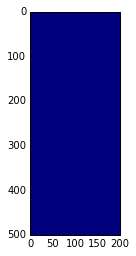

In [51]:
m = np.ones((depth, length))
plt.imshow(m)
plt.show()

In [52]:
m = np.triu(m, -depth//3)

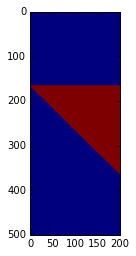

In [53]:
m[:depth//3,:] = 0
plt.imshow(m)
plt.show()

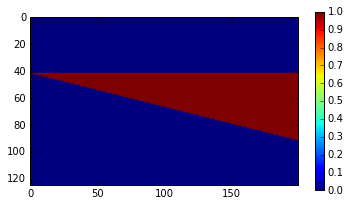

In [54]:
model = m[::4,:]
plt.imshow(model)
plt.colorbar(shrink=0.8)
plt.show()

In [77]:
rocks = np.array([[2700, 2750], [2400,2450]])

In [78]:
earth = np.take(rocks, model.astype(int), axis=0)

In [79]:
imp = np.apply_along_axis(np.product, -1, earth)

In [83]:
def make_rc(imp):
    upper = imp[:-1, :]
    lower = imp[1:, :]
    
    return (lower - upper) / (lower + upper)

rc = make_rc(imp)

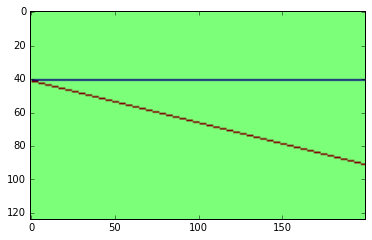

In [85]:
plt.imshow(rc)
plt.show()

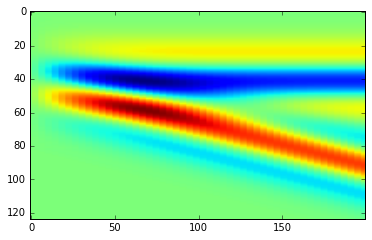

In [90]:
from scipy.signal import ricker

points = 80
f = 25

wavelet = ricker(points, 1000/(4*f))
wavelet = wavelet / max(wavelet)

synth = np.apply_along_axis(lambda t: np.convolve(t, wavelet, mode='same'), axis=0, arr=rc)

plt.imshow(synth)
plt.show()